In [1]:
import pandas as pd
import numpy as np

In [4]:
airlines = pd.read_csv('./dataset/nyc_airlines.csv', sep = ',', encoding='utf-8')
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [5]:
airports = pd.read_csv('./dataset/nyc_airports.csv', sep = ',', encoding='utf-8')
airports.head()

,faa,name,latitude,longitude,altitude,timezone,dst,timezone_name
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [17]:
flights_fixed = pd.read_csv('./dataset/nyc_flights_fixed.csv', sep = ',', encoding='utf-8')
flights_fixed.head(15)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
1,1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T10:00:00Z
2,2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T10:00:00Z
3,3,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T11:00:00Z
4,4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z
5,5,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01T11:00:00Z
6,6,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01T11:00:00Z
7,7,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01T11:00:00Z
8,8,2013,1,1,558,600,-2,849,851,-2,B6,49,N793JB,JFK,PBI,149,1028,6,0,2013-01-01T11:00:00Z
9,9,2013,1,1,558,600,-2,853,856,-3,B6,71,N657JB,JFK,TPA,158,1005,6,0,2013-01-01T11:00:00Z


In [40]:
delay = flights_fixed.query("dep_delay > 0")

In [41]:
delay = delay.groupby(['month','origin'])['dep_delay'].count().reset_index()

In [42]:
delay

,month,origin,dep_delay
0,1,EWR,4172
1,1,JFK,2505
2,1,LGA,1552
3,2,EWR,3595
4,2,JFK,2492
5,2,LGA,1633
6,3,EWR,4589
7,3,JFK,2875
8,3,LGA,2245
9,4,EWR,4303


In [46]:
import matplotlib.pyplot as plt 

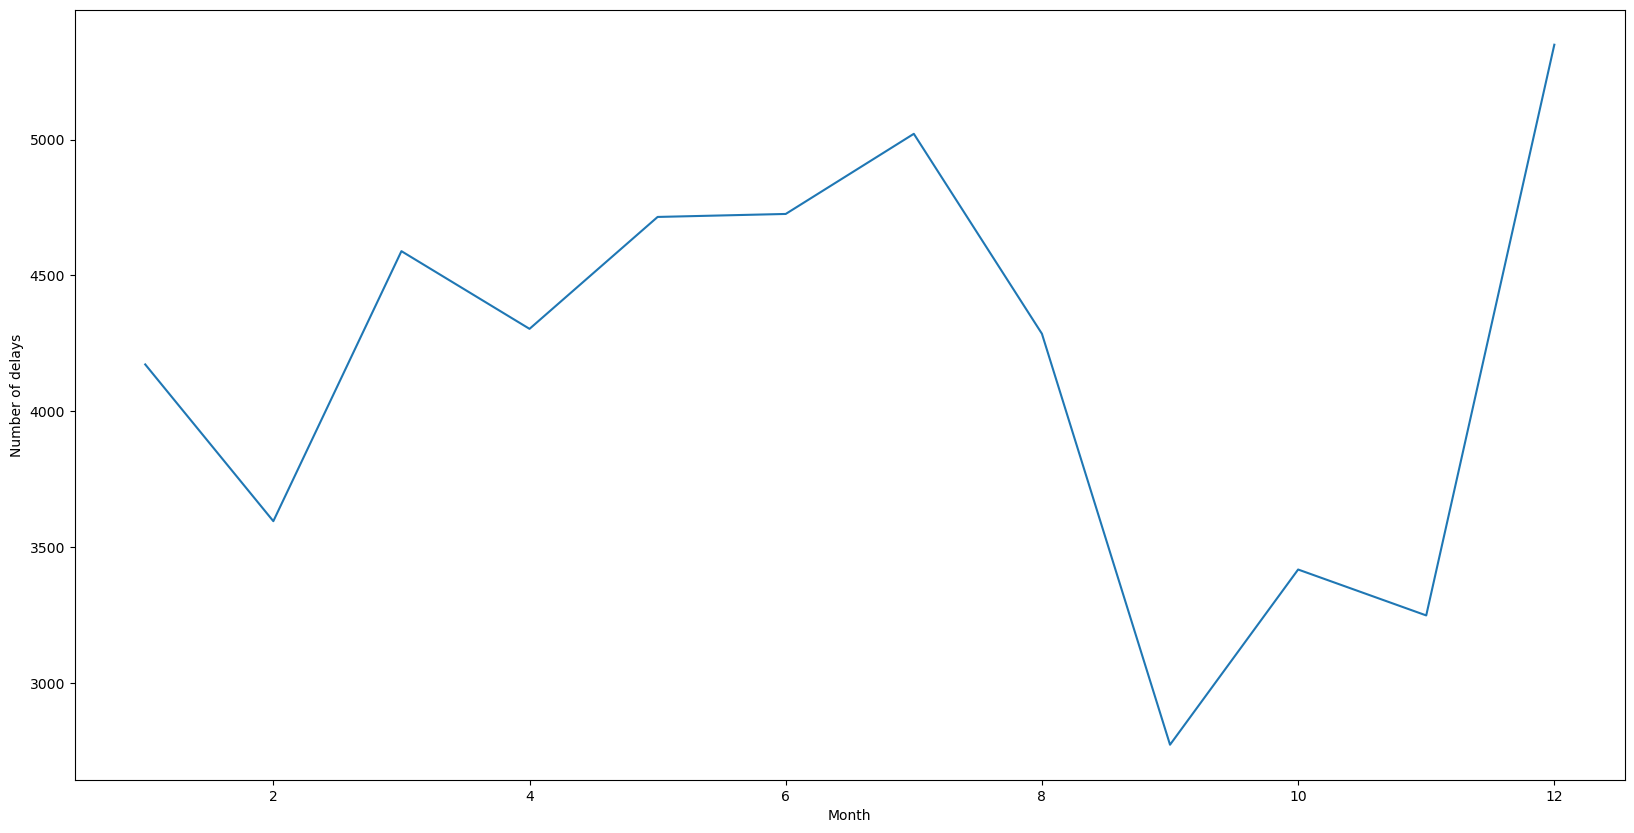

In [47]:
place = "EWR"
df = delay.query('origin == @place')

plt.figure(figsize=(20,10))
plt.plot(df['month'], df['dep_delay'])
plt.xlabel('Month')
plt.ylabel('Number of delays')
plt.show()

In [7]:
planes = pd.read_csv('./dataset/nyc_planes.csv', sep = ',', encoding='utf-8')
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [8]:
weather = pd.read_csv('./dataset/nyc_weather.csv', sep = ',', encoding='utf-8')
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


In [ ]:
flights_fixed.query('origin == "EWR"').groupby('dest')['dest'].count()